In [2]:
import sys
sys.path.append('..')

In [3]:
from helper_fun import *
import helper_fun
from Split_functions_classify.splits_two import *
from Split_functions_classify.splits_three import *
from Split_functions_classify.splits_ten import *

In [4]:
compounds = pd.read_csv('../COVID_MOONSHOT/compounds_filtered.csv')
compounds.head(2)

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040


### Adding columns for our different amounts of bins we will use to classify ###

In [5]:
two_split(compounds)
three_split(compounds)
ten_split(compounds).head(1)

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50,bin_2,bin_3,bin_10
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427,0,medium,2


Quick check

In [6]:
compounds.head(1)

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50,bin_2,bin_3,bin_10
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427,0,medium,2


Now we set our SEED, for reproducible results

In [7]:
SEED = 22
seed_everything(SEED)

Add in our compound fingerprints

In [8]:
compound_df = compounds.copy()

In [9]:
compound_df["maccs"] = compound_df["SMILES"].apply(smiles_to_fp,)

In [10]:
compound_df.head(2)

,Unnamed: 0,SMILES,CID,f_avg_IC50,r_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,f_avg_pIC50,r_avg_pIC50,bin_2,bin_3,bin_10,maccs
0,35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515,14.641091,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac34c0>,287.105862,3,1,3.28768,True,4.573171,4.834427,0,medium,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,57.590417,45.077469,<rdkit.Chem.rdchem.Mol object at 0x7fc319ac3530>,262.110613,2,1,3.41600,True,4.239650,4.346040,0,medium,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import matthews_corrcoef, f1_score

### Preprocessing the data using a random split ###

Two Bin Split

In [12]:
fingerprint_to_model = compound_df.maccs.to_list()
label_to_model_2 = compound_df.bin_2.to_list()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_2,
    static_test_x_2,
    static_train_y_2,
    static_test_y_2,
) = train_test_split(fingerprint_to_model, label_to_model_2, test_size=0.2, random_state=SEED)
splits_2 = [static_train_x_2, static_test_x_2, static_train_y_2, static_test_y_2]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_2))
print("Test data size:", len(static_test_x_2))

Training data size: 476
Test data size: 119


3 Bin Split

In [13]:
label_to_model_3 = compound_df.bin_3.to_list()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_3,
    static_test_x_3,
    static_train_y_3,
    static_test_y_3,
) = train_test_split(fingerprint_to_model, label_to_model_3, test_size=0.2, random_state=SEED)
splits_3 = [static_train_x_3, static_test_x_3, static_train_y_3, static_test_y_3]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_3))
print("Test data size:", len(static_test_x_3))

Training data size: 476
Test data size: 119


10 Bin Split

In [14]:
label_to_model_10 = compound_df.bin_10.to_list()

# Split data randomly in train and test set
# note that we use test/train_x for the respective fingerprint splits
# and test/train_y for the respective label splits
(
    static_train_x_10,
    static_test_x_10,
    static_train_y_10,
    static_test_y_10,
) = train_test_split(fingerprint_to_model, label_to_model_10, test_size=0.2, random_state=SEED)
splits = [static_train_x_10, static_test_x_10, static_train_y_10, static_test_y_10]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(static_train_x_10))
print("Test data size:", len(static_test_x_10))

Training data size: 476
Test data size: 119


# Neural Network Classifier #

Now look to compare the performance of a ANN Classifier using different amounts of bins for our data

In [15]:
# Specify model
model_ANN_2 = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=SEED)
model_ANN_3 = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=SEED)
model_ANN_10 = MLPClassifier(hidden_layer_sizes=(5, 3), random_state=SEED)

## 2 Bin ##

In [16]:
performance_measures = model_training_and_validation(model_ANN_2, "ANN", splits_2)

Sensitivity: 0.74
Specificity: 0.73
AUC: 0.77


/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### ROC curve ###

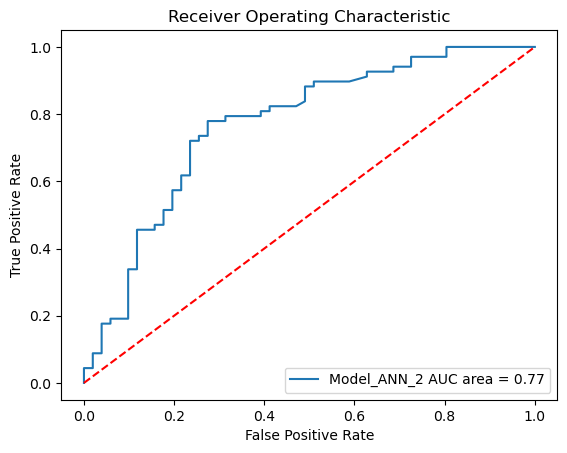

In [17]:
# Create a list for our models
models = [{"label": "Model_ANN_2", "model": model_ANN_2}]
# Plot roc curve
plot_roc_curves_for_models(models, static_test_x_2, static_test_y_2, False);

### MCC - helps us determine quality of binary classifications ### 

MCC takes a value between -1 and 1

In [18]:
y_pred_2 = model_ANN_2.predict(static_test_x_2)
matthews_corrcoef_2 = matthews_corrcoef(static_test_y_2,y_pred_2)
print("The matthews correlation coefficient is:",matthews_corrcoef_2)

The matthews correlation coefficient is: 0.4573681296948947


### F1 score ###

F1 score takes a value between 0 and 1

In [19]:
f1_score_2 = f1_score(static_test_y_2,y_pred_2)
print("F1 score is:",f1_score_2)

F1 score is: 0.7575757575757576


In [20]:
model_ANN_3.fit(static_train_x_3,static_train_y_3)

/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 3), random_state=22)

### One-vs-Rest multiclass ROC for 3 bin ###

In [21]:
from sklearn.preprocessing import LabelBinarizer

In [22]:
label_binarizer_3 = LabelBinarizer().fit(static_train_y_3)
y_onehot_test_3 = label_binarizer_3.transform(static_test_y_3)
y_onehot_test_3.shape

(119, 3)

In [23]:
test_prob_3 = model_ANN_3.predict_proba(static_test_x_3)

In [24]:
from sklearn.metrics import RocCurveDisplay

In [25]:
from itertools import cycle

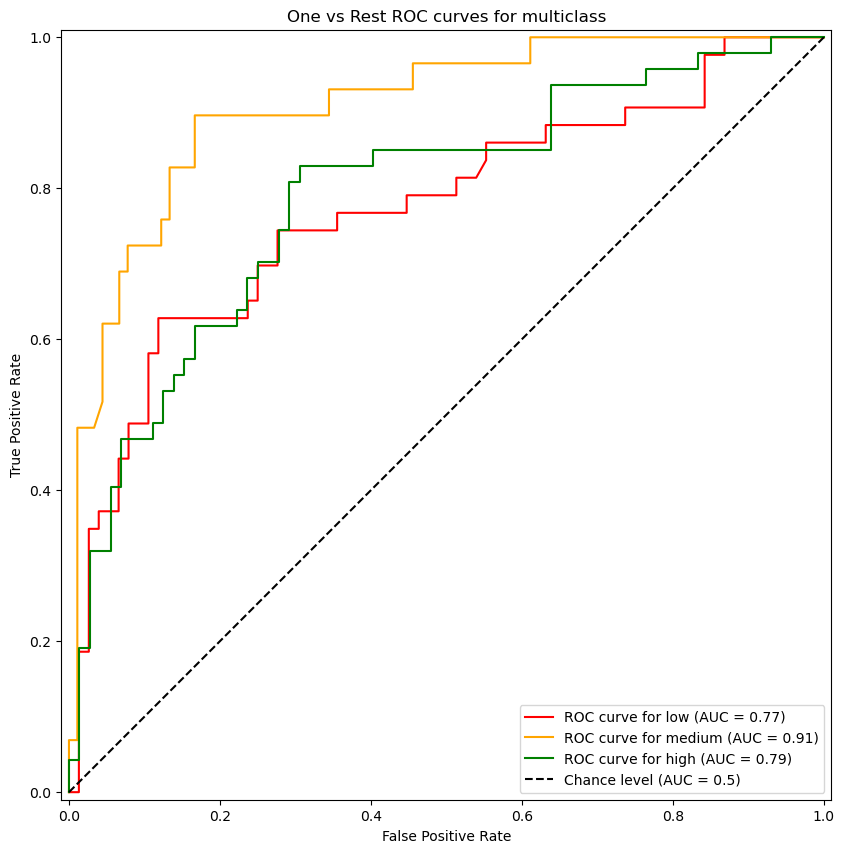

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

plt.figure(fig)
bins_label_3 =["low", "medium","high"]
colors = cycle(["red", "orange","green"])
for class_id, color in zip(range(3), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test_3[:, class_id],
        test_prob_3[:, class_id],
        name=f"ROC curve for {bins_label_3[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One vs Rest ROC curves for multiclass"
)


### ROC curve using micro-averaged OvR ###

In [27]:
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test_3.ravel(),test_prob_3.ravel())
roc_auc["micro"] = auc(fpr["micro"],tpr["micro"])

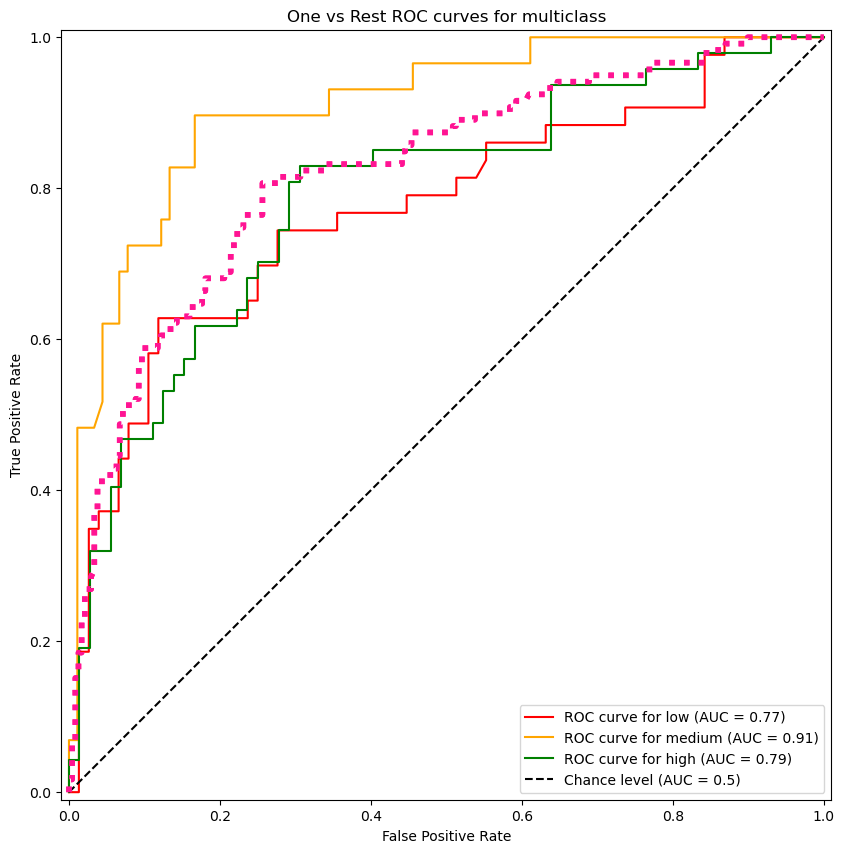

In [96]:
plt.figure(fig)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})",
    color = "deeppink",
    linestyle=":",
    linewidth=4,
)
plt.show()

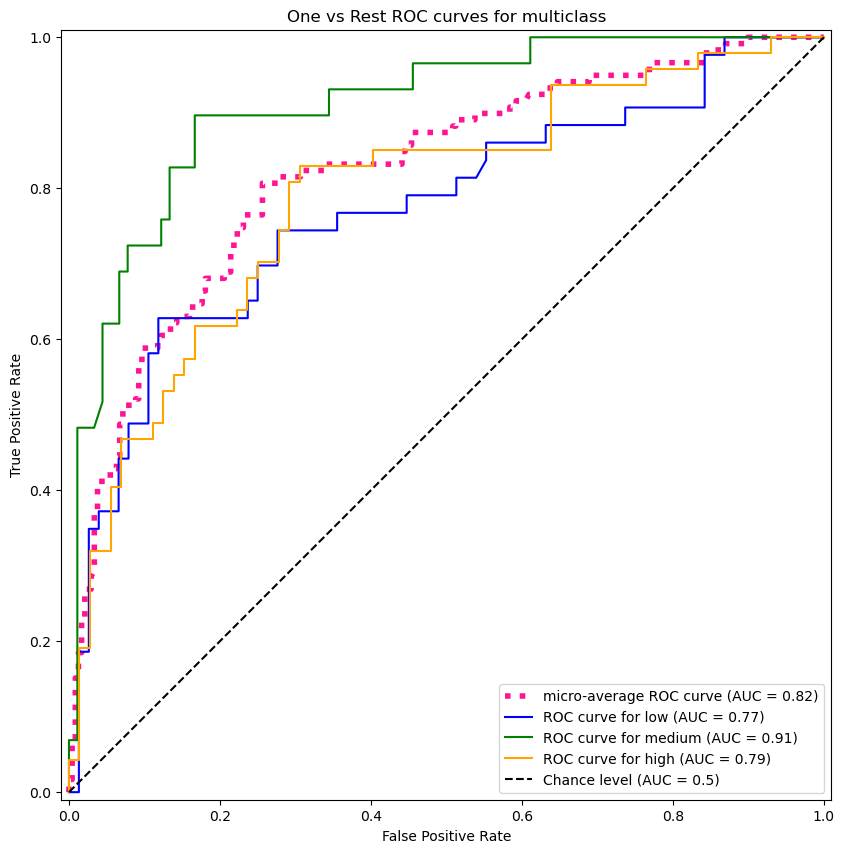

In [97]:
plot_roc_for_multi_class(model_ANN_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,True)

Need to add in the micro-averaging to the legend

Add in the ROC curve that using OvR macro-average

Clearly an error when trying to do macro-average as area is over 1

In [29]:
for i in range(3):
    fpr[i], tpr[i], _= roc_curve(y_onehot_test_3[:, i], test_prob_3[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
    
fpr_grid = np.linspace(0.0,1.0,100000)

mean_tpr = np.zeros_like(fpr_grid)

for i in range(3):
    mean_tpr += np.interp(fpr_grid, fpr[i],tpr[i])
    
mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])

mean_tpr /= 3

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"],tpr["macro"])
print(roc_auc["macro"])

1.087156555826675


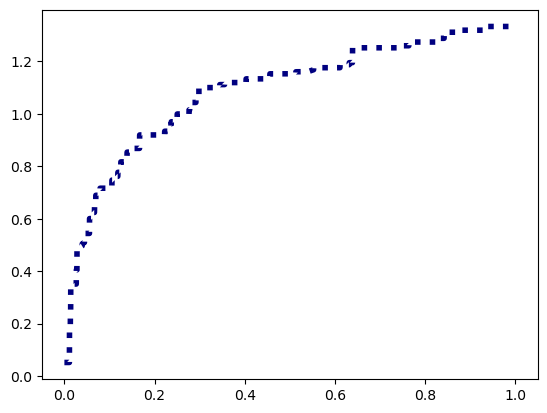

In [30]:
plt.figure()
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})",
    color = "navy",
    linestyle=":",
    linewidth=4,
)
plt.show()


In [31]:
macro_roc_auc_over = roc_auc_score(
    static_test_y_3,
    test_prob_3,
    multi_class="ovr",
    average="macro",
)

macro_roc_auc_over

0.8236613827314375

### MCC for multi-class (3 classes here) ###

In [32]:
y_pred_3 = model_ANN_3.predict(static_test_x_3)
matthews_corrcoef_3 = matthews_corrcoef(static_test_y_3,y_pred_3)
print("MCC:",matthews_corrcoef_3)

MCC: 0.51323401762137


### F1 for multi-class (3 classes here) ###

Have to specify average as this is not a binary class

In [33]:
f1_score_3 = f1_score(static_test_y_3,y_pred_3,average="micro")
print("F1 score using micro average is:",f1_score_3)

F1 score using micro average is: 0.6722689075630253


In [34]:
f1_score_3 = f1_score(static_test_y_3,y_pred_3,average="macro")
print("F1 score using macro average is:",f1_score_3)

F1 score using macro average is: 0.676470588235294


Write a quick function that will plot the ROC curves for multiclass 

In [93]:
def plot_roc_for_multi_class(model,static_test_x,static_train_y,static_test_y,bins_label,one_vs_rest=True,micro=True):
    test_prob = model.predict_proba(static_test_x)
    
    label_binarizer = LabelBinarizer().fit(static_train_y)
    y_onehot_test = label_binarizer.transform(static_test_y)
    
    fig, ax = plt.subplots(figsize=(10,10))
    if micro == True:
        plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})",
        color = "deeppink",
        linestyle=":",
        linewidth=4,
    )
    if one_vs_rest == True:
        colors = cycle(["blue","green","orange","red","violet","brown","aqua","black","darkblue","purple"])
        for class_id, color in zip(range(len(bins_label)), colors):
            RocCurveDisplay.from_predictions(
                y_onehot_test[:, class_id],
                test_prob[:, class_id],
                name=f"ROC curve for {bins_label[class_id]}",
                color=color,
                ax=ax,
                plot_chance_level=(class_id == len(bins_label)-1),
            )
    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="One vs Rest ROC curves for multiclass"
    )
    if one_vs_rest==False:
        plt.axline(xy1=[0,0],xy2=[1.0,1.0],color="black",label="Chance level (AUC = 0.5)",linestyle="--")
        plt.legend(
            loc = "lower right"
        )
    return None
    

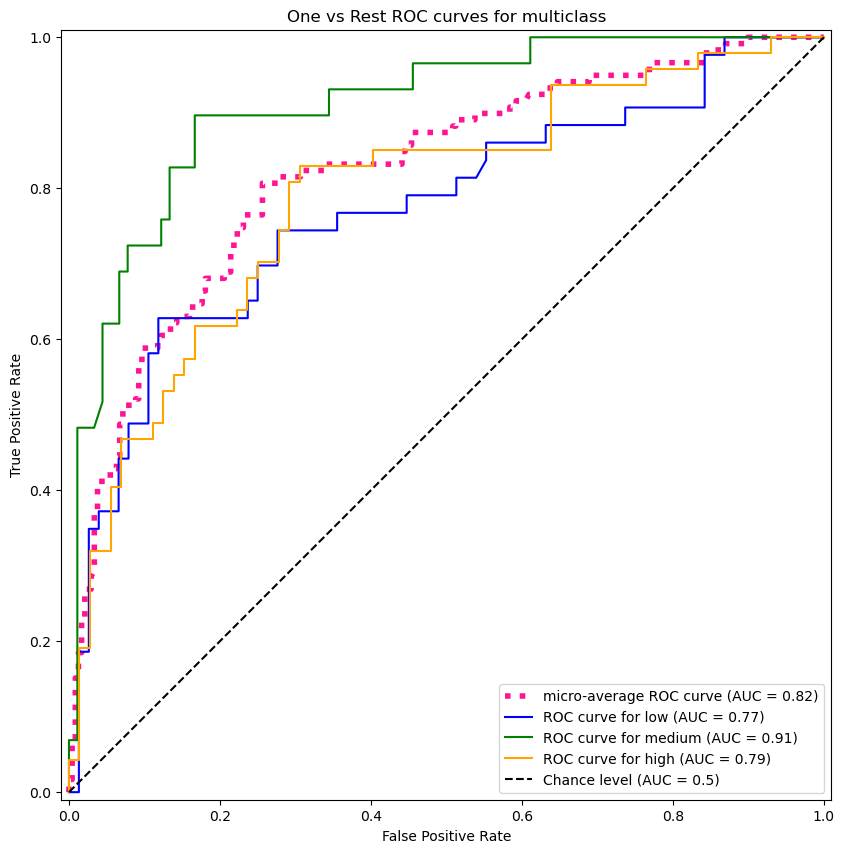

In [95]:
plot_roc_for_multi_class(model_ANN_3,static_test_x_3,static_train_y_3,static_test_y_3,bins_label_3,True,micro=True)

### Now can plot the same for 10bins ###

In [37]:
bins_label_10 = ['0','1','2','3','4','5','6','7','8','9']

In [38]:
model_ANN_10.fit(static_train_x_10,static_train_y_10)
test_prob_10 = model_ANN_3.predict_proba(static_test_x_10)

/home/alex/miniforge3/envs/my-rdkit-env-covid/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 10 Bin ROC curves ###

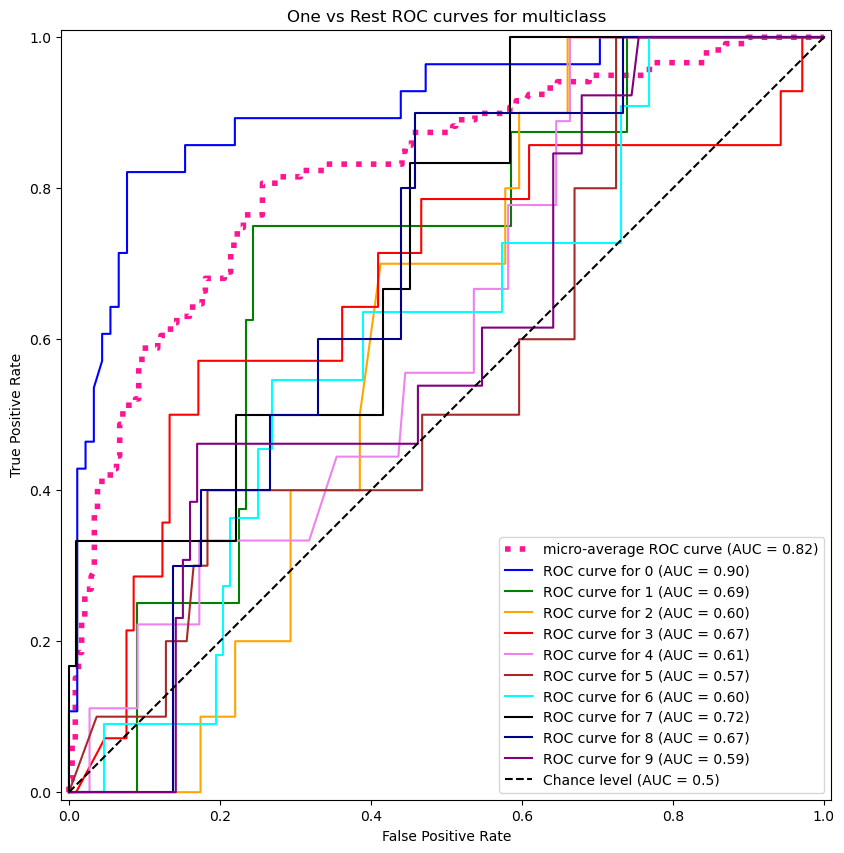

In [78]:
plot_roc_for_multi_class(model_ANN_10,static_test_x_10,static_train_y_10,static_test_y_10,bins_label_10,True,True)

### MCC for 10 classes ###

In [40]:
y_pred_10 = model_ANN_10.predict(static_test_x_10)
matthews_corrcoef_10 = matthews_corrcoef(static_test_y_10,y_pred_10)
print("MCC:",matthews_corrcoef_10)

MCC: 0.16477967930455176


This shows bad performance when we drastically increase the number of bins

### F1 for multi-class (10 classes here) ###

Have to specify average as this is not a binary class

In [41]:
f1_score_10 = f1_score(static_test_y_10,y_pred_10,average="micro")
print("F1 score using micro average is:",f1_score_10)

F1 score using micro average is: 0.29411764705882354


In [42]:
f1_score_10 = f1_score(static_test_y_10,y_pred_10,average="macro")
print("F1 score using macro average is:",f1_score_10)

F1 score using macro average is: 0.11474747474747475


The low value shows this is not a good model to classify between 10 classes, so this wouldn't be suitable to determine pIC50 values.